In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('model_df.csv')

In [17]:
df.head()

bookingID  second  Accuracy  Bearing      Speed  acceleration_x  \
0  1.194001e+12   246.0       4.0    203.0   6.480000        1.001973   
1  1.099512e+12    66.0       3.0    311.0   0.340365        0.452518   
2  8.589935e+09   430.0       3.9     22.0  13.840000       -0.452377   
3  5.841156e+11  1044.0       4.0    199.0  26.240519       -6.914666   
4  1.554778e+12    72.0       6.0    332.0  12.075355       -1.972882   

   acceleration_y  acceleration_z    gyro_x    gyro_y    gyro_z  
0        9.745000       -0.790087 -0.066046  0.019175  0.044741  
1        9.273026        3.098191  0.005382  0.002155 -0.001436  
2        9.679642        2.923172 -0.003677  0.009720 -0.026703  
3        2.839610        6.498062  0.011221 -0.035768  0.039490  
4        9.711179        1.735849  0.011042  0.158532 -0.011837

In [18]:
df.describe()

bookingID        second      Accuracy       Bearing         Speed  \
count  9.869876e+06  9.869876e+06  9.869876e+06  9.869876e+06  9.869876e+06   
mean   8.207874e+11  5.993891e+02  4.095420e+00  1.679335e+02  8.985428e+00   
std    4.939730e+11  4.612251e+02  9.970412e-01  1.079786e+02  8.160272e+00   
min    1.000000e+00  0.000000e+00  7.500000e-01  0.000000e+00  0.000000e+00   
25%    3.865471e+11  2.430000e+02  3.464000e+00  7.695140e+01  3.465148e-01   
50%    8.074539e+11  5.210000e+02  3.900000e+00  1.670000e+02  7.670000e+00   
75%    1.254130e+12  8.580000e+02  4.000000e+00  2.620000e+02  1.555993e+01   
max    1.709397e+12  8.235000e+03  7.799000e+00  3.599986e+02  3.912000e+01   

       acceleration_x  acceleration_y  acceleration_z        gyro_x  \
count    9.869876e+06    9.869876e+06    9.869876e+06  9.869876e+06   
mean     1.090258e-01    8.517005e+00    1.595264e+00 -1.687968e-04   
std      1.361022e+00    3.905624e+00    2.785688e+00  1.278135e-01   
min     -7.841969e+01   -5.780019e+01   -7.844842e+01 -3.347175e+01   
25%     -4.590000e-01    8.782471e+00   -2.059076e-01 -2.304428e-02   
50%      1.053481e-01    9.452597e+00    1.324591e+00  0.000000e+00   
75%      6.707611e-01    9.824936e+00    3.202245e+00  2.253723e-02   
max      4.770832e+01    7.281000e+01    7.766549e+01  3.983975e+01   

             gyro_y        gyro_z  
count  9.869876e+06  9.869876e+06  
mean  -1.810472e-03 -1.848190e-04  
std    3.698919e-01  1.270341e-01  
min   -7.488861e+01 -3.651154e+01  
25%   -2.767944e-02 -1.761200e-02  
50%    0.000000e+00 -1.745329e-05  
75%    2.737348e-02  1.704423e-02  
max    6.419057e+01  6.630078e+01

In [19]:
df['acceleration']=np.sqrt(df['acceleration_x']**2 + df['acceleration_y']**2 + df['acceleration_z']**2)
df['gyro']=np.sqrt(df['gyro_x']**2 + df['gyro_y']**2 + df['gyro_z']**2)

In [20]:
df.sort_values(['bookingID','second'],inplace=True)

In [21]:
df['Bearing_diff']=df['Bearing'].diff()
df.loc[df['second']==0,['Bearing_diff']]= 0

In [22]:
df['Speed_diff']=df['Speed'].diff()
df.loc[df['second']==0,['Speed_diff']]= 0

In [23]:
df['distance'] = df['Speed'] * df['second'].diff()

In [24]:
df.head()

bookingID  second  Accuracy  Bearing     Speed  acceleration_x  \
1116939        1.0     0.0       4.0    252.0  4.756427       -1.394632   
7864621        1.0     1.0       4.0    236.0  4.937211       -0.840489   
7604383        1.0     2.0       4.0    228.0  5.544210       -1.944456   
4505130        1.0     3.0       4.0    222.0  6.564030       -0.820675   
3038028        1.0     4.0       4.0    216.0  7.358976       -1.020284   

         acceleration_y  acceleration_z    gyro_x    gyro_y    gyro_z  \
1116939       10.174141       -2.503770  0.016127  0.212284 -0.039776   
7864621        8.749026       -3.274607  0.037472  0.134862 -0.011083   
7604383        8.989030       -2.978358 -0.024487  0.102224 -0.014870   
4505130        9.282243       -2.126961  0.007522  0.089431  0.006004   
3038028        9.382215       -2.618797 -0.019007  0.002409 -0.014382   

         acceleration      gyro  Bearing_diff  Speed_diff  distance  
1116939     10.570100  0.216580           0.0    0.000000       NaN  
7864621      9.379495  0.140409         -16.0    0.180784  4.937211  
7604383      9.667171  0.106162          -8.0    0.606999  5.544210  
4505130      9.558112  0.089947          -6.0    1.019819  6.564030  
3038028      9.794133  0.023956          -6.0    0.794946  7.358976

In [25]:
#Visualize a random trip:
trip1  = df[df['bookingID'] == 1]

In [45]:
trip1

bookingID  second  Accuracy  Bearing      Speed  acceleration_x  \
1116939        1.0     0.0     4.000    252.0   4.756427       -1.394632   
7864621        1.0     1.0     4.000    236.0   4.937211       -0.840489   
7604383        1.0     2.0     4.000    228.0   5.544210       -1.944456   
4505130        1.0     3.0     4.000    222.0   6.564030       -0.820675   
3038028        1.0     4.0     4.000    216.0   7.358976       -1.020284   
290984         1.0     5.0     4.000    214.0   8.297936       -0.745468   
7415674        1.0     6.0     4.000    212.0   8.477888       -0.485889   
9643869        1.0     7.0     4.000    212.0   7.977206       -1.118102   
9342822        1.0     8.0     4.000    213.0   7.732447       -1.050183   
365156         1.0     9.0     4.000    211.0   7.140307       -1.055000   
6735329        1.0    10.0     4.000    210.0   6.565919       -0.526657   
5935255        1.0    11.0     4.000    210.0   6.108070       -0.025158   
5101734        1.0    12.0     4.000    212.0   4.940286       -0.770646   
3451752        1.0    13.0     3.814    213.0   3.865959       -0.696406   
7172004        1.0    15.0     3.716    213.0   2.535881       -0.957393   
5178032        1.0    16.0     3.518    214.0   2.567090       -0.905841   
1012731        1.0    17.0     3.556    216.0   3.032062       -0.010209   
6397233        1.0    18.0     3.519    216.0   2.795793       -0.728048   
6035460        1.0    19.0     3.292    220.0   1.735459       -0.825425   
5724148        1.0    20.0     3.160    220.0   1.534565       -1.038289   
5194032        1.0    21.0     3.222    221.0   2.078886       -1.514352   
6596600        1.0    22.0     3.505    220.0   3.037947       -1.193510   
257102         1.0    23.0     3.555    215.0   3.036725       -1.073512   
7996121        1.0    24.0     3.589    211.0   3.193330       -1.007547   
8344746        1.0    25.0     3.629    210.0   3.246199       -0.892587   
173282         1.0    26.0     3.539    210.0   2.801283       -0.738659   
7174346        1.0    27.0     3.445    210.0   2.465514       -0.849223   
7127074        1.0    28.0     3.232    210.0   1.634508       -0.741599   
1526740        1.0    29.0     3.000    210.0   0.000000       -0.657400   
5963855        1.0    30.0     3.000    209.0   0.000000       -0.928615   
...            ...     ...       ...      ...        ...             ...   
992893         1.0  1005.0     4.000    110.0  17.208820       -0.442037   
9288096        1.0  1006.0     4.000    110.0  17.695435       -0.287553   
8959828        1.0  1007.0     4.000    110.0  18.156572       -1.020926   
1395387        1.0  1008.0     4.000    110.0  18.724695       -0.264923   
3810184        1.0  1009.0     4.000    109.0  18.949870        0.151112   
6845889        1.0  1010.0     4.000    110.0  18.734638       -0.592220   
5494211        1.0  1011.0     4.000    110.0  18.604550       -0.177439   
6459662        1.0  1012.0     4.000    110.0  18.455862       -0.183980   
6481889        1.0  1013.0     4.000    110.0  17.974268       -0.280170   
7480766        1.0  1014.0     4.000    110.0  17.168920        0.262414   
6450932        1.0  1015.0     4.000    110.0  16.382648       -0.495590   
7609810        1.0  1016.0     4.000    110.0  15.617298        0.983031   
2775780        1.0  1017.0     4.000    110.0  14.512501        0.159052   
8119155        1.0  1018.0     4.000    111.0  13.342352        0.073512   
1771753        1.0  1019.0     4.000    112.0  12.362721       -0.133443   
8725009        1.0  1020.0     4.000    112.0  11.447700       -0.365097   
6200472        1.0  1021.0     4.000    112.0  10.954950       -0.431675   
3090818        1.0  1022.0     4.000    111.0  10.629112        0.216168   
6674316        1.0  1023.0     4.000    113.0  10.999967       -0.115937   
9485424        1.0  1024.0     4.000    116.0  11.417870       -0.315450   
3213465        1.0  1025.0     4.000    118.0  11.458255 

In [26]:
trip1.sort_values('second',inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


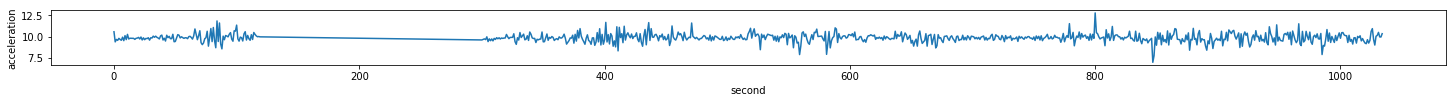

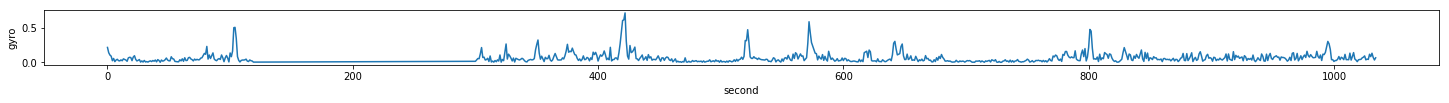

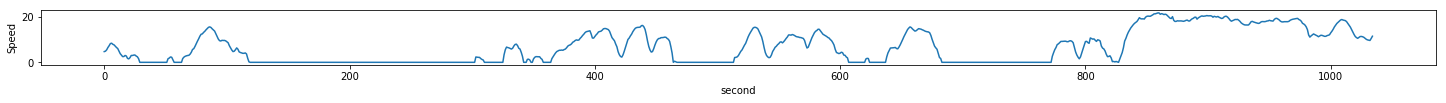

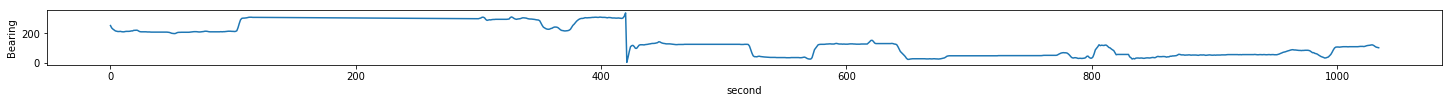

In [27]:
plt.figure(figsize=(25,1))
sns.lineplot(data=trip1,x='second',y='acceleration')
plt.figure(figsize=(25,1))
sns.lineplot(data=trip1,x='second',y='gyro')
plt.figure(figsize=(25,1))
sns.lineplot(data=trip1,x='second',y='Speed')
plt.figure(figsize=(25,1))
sns.lineplot(data=trip1,x='second',y='Bearing')

In [28]:
trip2 = df[df['bookingID'] == 1073741824054] 

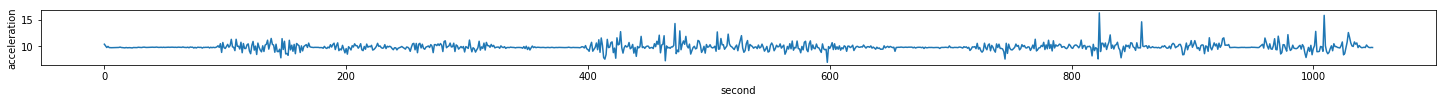

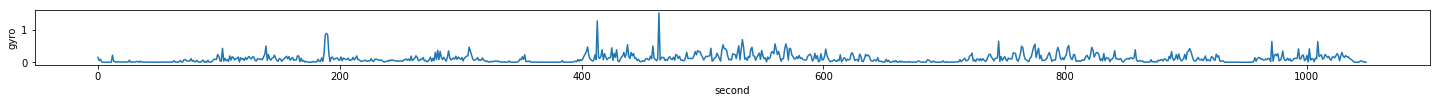

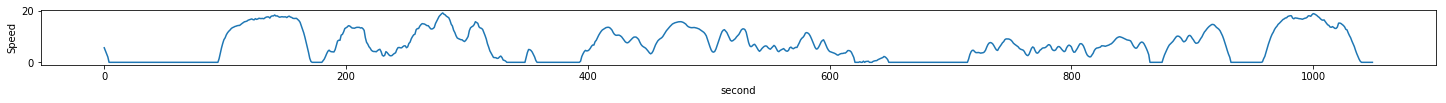

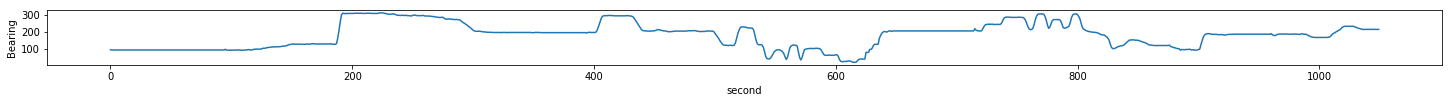

In [29]:
plt.figure(figsize=(25,1))
sns.lineplot(data=trip2,x='second',y='acceleration')
plt.figure(figsize=(25,1))
sns.lineplot(data=trip2,x='second',y='gyro')
plt.figure(figsize=(25,1))
sns.lineplot(data=trip2,x='second',y='Speed')
plt.figure(figsize=(25,1))
sns.lineplot(data=trip2,x='second',y='Bearing')

In [30]:
df['bookingID'].unique()

array([1.00000000e+00, 2.00000000e+00, 6.00000000e+00, ...,
       1.70939698e+12, 1.70939698e+12, 1.70939698e+12])

In [31]:
def quantile_25(x):
    return x.quantile(0.25)
def quantile_5(x):
    return x.quantile(0.5)
def quantile_75(x):
    return x.quantile(0.75)
def quantile_8(x):
    return x.quantile(0.8)
def quantile_9(x):
    return x.quantile(0.9)
def triptime(x):
    return x.max()
def Count_Bearing(x):
    return x[(np.abs(x)>20) & (np.abs(x)< 340)].count()
def Count_Accelerating(x):
    return x[(np.abs(x)>10)].count()

In [46]:
model_df_1 = df.pivot_table(index='bookingID',values = ['distance'], aggfunc=sum)
model_df_2 = df.pivot_table(index='bookingID',values = ['second'], aggfunc=max)

In [47]:
model_df_3 = df.pivot_table(index='bookingID',values=['Speed','Bearing'],aggfunc=[quantile_25,quantile_5,quantile_75,quantile_8,quantile_9])

In [48]:
model_df_4 = df.pivot_table(index='bookingID',values=['Speed','Bearing','acceleration','gyro'],aggfunc=[np.mean,np.std,np.min,np.max])

In [49]:
model_df_5 = df.pivot_table(index= 'bookingID',values='Speed_diff',aggfunc=[Count_Accelerating])

In [50]:
model_df_6 = df.pivot_table(index='bookingID',values=['Bearing_diff'],aggfunc=[Count_Bearing])

In [51]:
model_df = model_df_1.join([model_df_2,model_df_3,model_df_4,model_df_5,model_df_6])

In [52]:
model_df.head()

distance  second  (quantile_25, Bearing)  (quantile_25, Speed)  \
bookingID                                                                      
1.0        6844.871210  1034.0                    50.0              0.000000   
2.0       -7728.588029   825.0                    22.0              0.000000   
6.0       -2197.100215  1094.0                    81.0              0.000000   
7.0        2442.478928   959.0                    46.0              3.545921   
8.0        -547.920000   462.0                     0.0              0.000000   

           (quantile_5, Bearing)  (quantile_5, Speed)  (quantile_75, Bearing)  \
bookingID                                                                       
1.0                        110.0             7.206634                   208.0   
2.0                        232.0             2.991146                   288.0   
6.0                        248.0             1.379736                   293.0   
7.0                         57.0            13.017325                    87.0   
8.0                        201.0             1.900000                   304.0   

           (quantile_75, Speed)  (quantile_8, Bearing)  (quantile_8, Speed)  \
bookingID                                                                     
1.0                   13.779108                  212.0            15.332941   
2.0                    5.281074                  289.6             5.794284   
6.0                    9.030643                  300.0            10.426770   
7.0                   20.886913                   94.0            22.042671   
8.0                   10.620000                  307.0            12.678000   

           ...  (amin, Bearing)  (amin, Speed)  (amin, acceleration)  \
bookingID  ...                                                         
1.0        ...              5.0            0.0              6.970526   
2.0        ...              1.0            0.0              8.234988   
6.0        ...              0.0            0.0              7.218154   
7.0        ...              0.0            0.0              5.525063   
8.0        ...              0.0            0.0              4.096356   

           (amin, gyro)  (amax, Bearing)  (amax, Speed)  (amax, acceleration)  \
bookingID                                                                       
1.0            0.000509            337.0      21.882141             12.790147   
2.0            0.003169            354.0       9.360483             13.403410   
6.0            0.002113            359.0      16.394695             14.498268   
7.0            0.002993            359.0      25.230654             14.097100   
8.0            0.001806            348.0      17.830000             13.513198   

           (amax, gyro)  (Count_Accelerating, Speed_diff)  \
bookingID                                                   
1.0            0.717864                               0.0   
2.0            0.463685                               0.0   
6.0            0.626294                               0.0   
7.0            1.423130                               0.0   
8.0            0.420451                               1.0   

           (Count_Bearing, Bearing_diff)  
bookingID                                 
1.0                                 15.0  
2.0                                 10.0  
6.0                                 31.0  
7.0                                  2.0  
8.0                                 16.0  

[5 rows x 30 columns]

In [54]:
model_df.to_csv('feature_extracted.csv')